In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from scipy.stats import ttest_ind
from itertools import product
warnings.filterwarnings('ignore')

In [2]:
cab_data=pd.read_csv("Cab_Data.csv")
city=pd.read_csv("City.csv")
customer_id=pd.read_csv("Customer_ID.csv")
transaction_id=pd.read_csv("Transaction_ID.csv")

In [3]:
dfs=[cab_data,city,customer_id,transaction_id]
for df in dfs:
    display(df.head())
    print(df.shape)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


(359392, 7)


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


(20, 3)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


(49171, 4)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


(440098, 3)


In [4]:
tran_cus=pd.merge(transaction_id,customer_id, on=['Customer ID'],how='left')
cab_city=pd.merge(cab_data,city, on=['City'], how='left')
df_all=pd.merge(cab_city,tran_cus,on=['Transaction ID'],how='left')

In [157]:
display(df_all.head(7))
print(df_all.shape)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit per KM,Years
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45000,370.95000,313.63500,"814,885","24,701",29290,Card,Male,28,10813,57.31500,1.88227,2016
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62000,358.52000,334.85400,"814,885","24,701",27703,Card,Male,27,9237,23.66600,0.82690,2016
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04000,125.20000,97.63200,"814,885","24,701",28712,Cash,Male,53,11242,27.56800,3.04956,2016
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17000,377.40000,351.60200,"814,885","24,701",28020,Cash,Male,23,23327,25.79800,0.77775,2016
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73000,114.62000,97.77600,"814,885","24,701",27182,Card,Male,33,8536,16.84400,1.92944,2016
5,10000016,2016-01-07,Pink Cab,ATLANTA GA,6.06000,72.43000,63.02400,"814,885","24,701",27318,Cash,Male,25,13984,9.40600,1.55215,2016
6,10000017,2016-01-03,Pink Cab,AUSTIN TX,44.00000,576.15000,475.20000,"698,371","14,978",33788,Card,Male,23,23788,100.95000,2.29432,2016


(359392, 17)


In [6]:
# We should transform the Date of Travel column to datetime format. I have decided to this excel and then update dataframe here.
df_all[['Transaction ID','Date of Travel']].to_excel('tran_date',engine='xlsxwriter')

In [19]:
date_update=pd.read_excel('tran_date')

In [20]:
date_update.drop('Unnamed: 0', axis=1,inplace=True)

In [21]:
df_all['Transaction ID'].isin(date_update['Transaction ID']).value_counts()

True    359392
Name: Transaction ID, dtype: int64

In [22]:
df_all.loc[df_all['Transaction ID'].isin(date_update['Transaction ID']),['Date of Travel']]=date_update['Date of Travel'].values

In [23]:
# Yes! Problem solved.
df_all.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813,57.315,1.882266
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237,23.666,0.826904
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash,Male,53,11242,27.568,3.049558
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash,Male,23,23327,25.798,0.777751
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card,Male,33,8536,16.844,1.929439


In [24]:
# Let's calculate profit value of every transaction and group by according to Company and then aggregate with sum.
df_all['Profit']=df_all['Price Charged']-df_all['Cost of Trip']

In [25]:
df_all['Profit per KM']=df_all['Profit']/df_all['KM Travelled']

In [26]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  object        
 8   Users               359392 non-null  object        
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [27]:
#There are only two company.
df_all.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [28]:
df_all.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [107]:
df_all.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit per KM,Years
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80000,69.24000,63.36000,"418,859","127,001",52392,Cash,Male,24,15651,5.88000,1.22500,2018
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40000,113.75000,106.84800,"418,859","127,001",53286,Cash,Male,32,6528,6.90200,0.82167,2018
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75000,437.07000,349.65000,"418,859","127,001",52265,Cash,Male,56,7966,87.42000,3.15027,2018
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80000,146.19000,114.04800,"418,859","127,001",52175,Card,Male,32,6423,32.14200,3.65250,2018
359391,10440107,2018-01-02,Yellow Cab,WASHINGTON DC,12.76000,191.58000,177.61920,"418,859","127,001",52917,Card,Male,20,11284,13.96080,1.09411,2018


### Let's investigate first research question. What is the profit state of companies for every year ?

In [30]:
df_all['Years']=df_all.loc[:,'Date of Travel'].dt.year

In [31]:
df_all.groupby(['Years','Company'])['Profit'].mean()

Years  Company   
2016   Pink Cab       68.321819
       Yellow Cab    169.347821
2017   Pink Cab       67.070839
       Yellow Cab    168.817057
2018   Pink Cab       53.229689
       Yellow Cab    143.416122
Name: Profit, dtype: float64

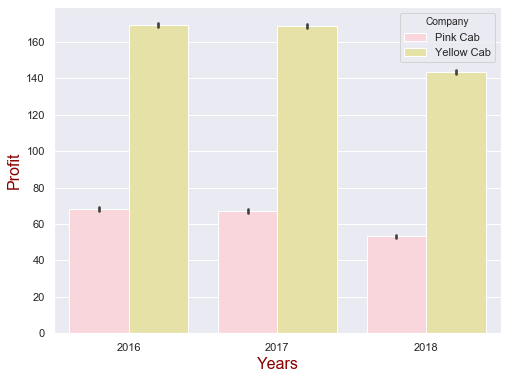

In [106]:
plt.figure(figsize=(8,6))
sns.set(style="darkgrid")
sns.barplot(df_all.Years,df_all['Profit'],hue=df_all.Company,palette=['#ffd0d7','#f1eb9c'],alpha=1)
plt.xlabel('Years',fontdict={'color':'darkred','size':16})
plt.ylabel('Profit',fontdict={'color':'darkred','size':16})
plt.show()

In [99]:
ttest_value = ttest_ind(df_all[df_all.Company=='Pink Cab']['Profit'], 
                        df_all[df_all.Company=='Yellow Cab']['Profit'])
print(ttest_value)

Ttest_indResult(statistic=-160.37151759478058, pvalue=0.0)


#### T-test shows us, profit difference  are all statistically significant, p-value is lower than 0.05.

### Secondly, What is the transactions values of companies for every year?

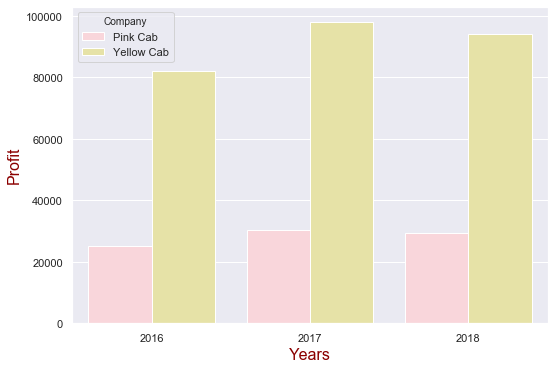

In [119]:
plt.figure().add_axes([0,0,1.1,1.1])
sns.countplot(x="Years", hue="Company", palette=['#ffd0d7','#f1eb9c'],data=df_all)
plt.xlabel('Years',fontdict={'color':'darkred','size':16})
plt.ylabel('Profit',fontdict={'color':'darkred','size':16})
plt.show()

### Third,What about companies age disturibution ?

<Figure size 792x648 with 0 Axes>

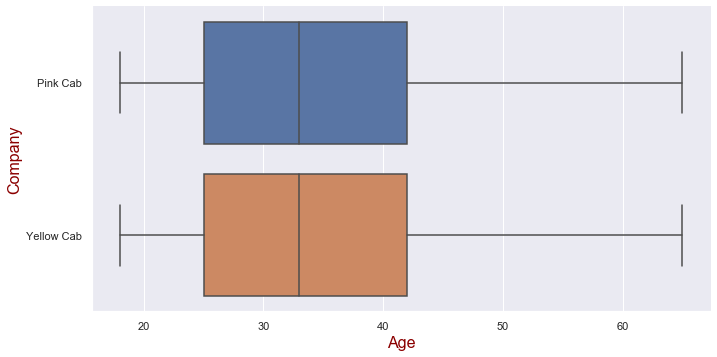

In [153]:
plt.figure(figsize=(11,9))
ax=sns.catplot(x = "Age" , y="Company" ,kind="box" ,data=df_all,height=5, aspect=2)
plt.xlabel('Age',fontdict={'color':'darkred','size':16})
plt.ylabel('Company',fontdict={'color':'darkred','size':16})
plt.show()

### Fourthly, Let's investigate profits state of companies in the biggest three cities?

<Figure size 1440x1440 with 0 Axes>

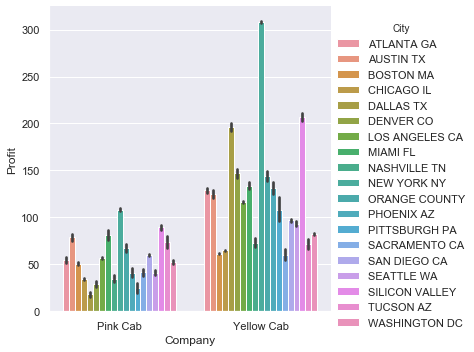

In [156]:
plt.figure(figsize=(20,20))
sns.catplot("Company", 'Profit',hue='City',
            data=df_all,kind="bar",height=5, aspect=1)
plt.show()